In [ ]:
# /content/drive/MyDrive/Practice Notebook/Predict House Price/home_data.csv

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Practice Notebook/Predict House Price/home_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


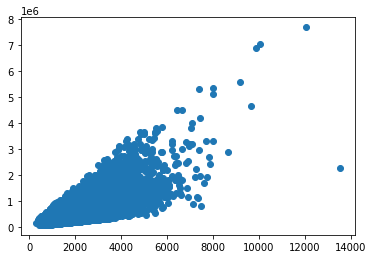

In [4]:
plt.scatter(df['sqft_living'], df['price'])

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
simple_model = LinearRegression().fit(train[['sqft_living']], train['price'])

In [9]:
prediction = simple_model.predict(test[['sqft_living']])
label = test['price']
np.sqrt(sklearn.metrics.mean_squared_error(label, prediction))

248879.06143647005

In [24]:
from scipy import stats

def linear_equation(data, labels):
  std_X = np.std(data)
  std_Y = np.std(labels)

  pearson_r = stats.pearsonr(data, labels)[0]

  b = pearson_r * (std_Y / std_X)
  a = np.mean(labels) - b * np.mean(data)

  return a, b

In [28]:
def linear_predict(data, label):
  a, b = linear_equation(data, label)
  return a + b * data

In [29]:
prediction = linear_predict(test['sqft_living'], test['price'])
np.sqrt(sklearn.metrics.mean_squared_error(label, prediction))

248117.09356761342

In [30]:
def rss(label, predict):
  return sum((label - predict) **2)

In [31]:
rss(test['price'], prediction)

266132924236661.12